In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
y_max = 7

Total files: 2000
--------------
Average execution time for Tree Sitter: 1.87 ms
Average execution time for Pyright: 0.93 ms
Average execution time for ANTLR: 1.75 ms


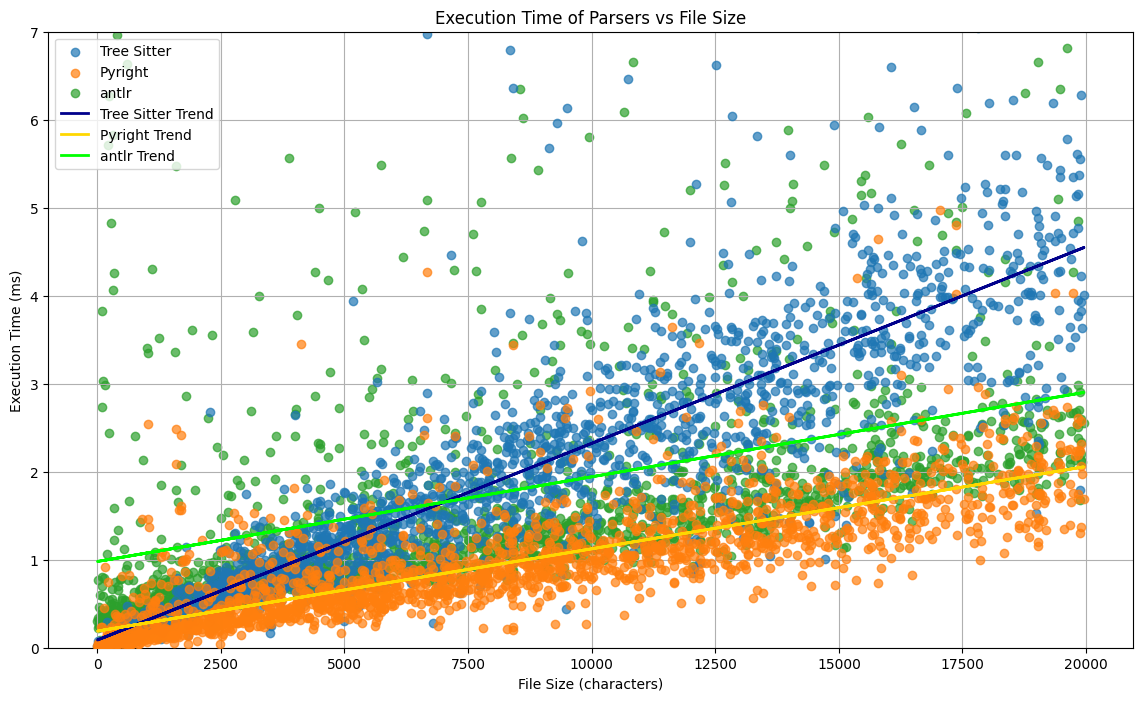

In [12]:


# Чтение данных из JSON-файла
with open('results.json', 'r') as f:
    data = json.load(f)

# Инициализация списков для хранения данных времени выполнения для каждого парсера
tree_sitter_times = []
pyright_times = []
antlr_times = []
sizes = []

# Итерация по данным и заполнение списков времени выполнения и размеров
for item in data:
    tree_sitter_times.append(item['tree-sitterTime'])
    pyright_times.append(item['pyrightTime'])
    antlr_times.append(item['antlrTime'])
    sizes.append(item['size'])


# Вычисление средних значений
mean_tree_sitter = np.mean(tree_sitter_times)
mean_pyright = np.mean(pyright_times)
mean_antlr = np.mean(antlr_times)



# вывод инфы
print(f'Total files: {len(tree_sitter_times)}')
print('--------------')
print(f'Average execution time for Tree Sitter: {mean_tree_sitter:.2f} ms')
print(f'Average execution time for Pyright: {mean_pyright:.2f} ms')
print(f'Average execution time for ANTLR: {mean_antlr:.2f} ms')


# Построение графика времени выполнения парсеров в зависимости от размера
plt.figure(figsize=(14, 8))  # Увеличенный размер фигуры
plt.scatter(sizes, tree_sitter_times, label='Tree Sitter', alpha=0.7, zorder=2)
plt.scatter(sizes, pyright_times, label='Pyright', alpha=0.7, zorder=3)
plt.scatter(sizes, antlr_times, label='antlr', alpha=0.7, zorder=1)

# Линии тренда
z_tree_sitter = np.polyfit(sizes, tree_sitter_times, 1)
p_tree_sitter = np.poly1d(z_tree_sitter)
plt.plot(sizes, p_tree_sitter(sizes), color='darkblue', linestyle='-', linewidth=2, label='Tree Sitter Trend', zorder=4)

z_pyright = np.polyfit(sizes, pyright_times, 1)
p_pyright = np.poly1d(z_pyright)
plt.plot(sizes, p_pyright(sizes), color='gold', linestyle='-', linewidth=2, label='Pyright Trend', zorder=4)

z_antlr = np.polyfit(sizes, antlr_times, 1)
p_antlr = np.poly1d(z_antlr)
plt.plot(sizes, p_antlr(sizes), color='lime', linestyle='-', linewidth=2, label='antlr Trend', zorder=4)

plt.xlabel('File Size (characters)')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parsers vs File Size')
plt.legend()
plt.grid(True)
plt.ylim(0, y_max)  # Ограничение по оси Y для исключения выбросов
plt.show()

Median execution time deviation for Tree Sitter: -0.04 ms
Median execution time deviation for Pyright: -0.10 ms
Median execution time deviation for ANTLR: -0.54 ms
--------------
Standard deviation for Tree Sitter: 0.71
Standard deviation for Pyright: 0.41
Standard deviation for ANTLR: 2.44
--------------
Correlation (size, execution time) for Tree Sitter: 0.87
Correlation (size, execution time) for Pyright: 0.79
Correlation (size, execution time) for ANTLR: 0.22


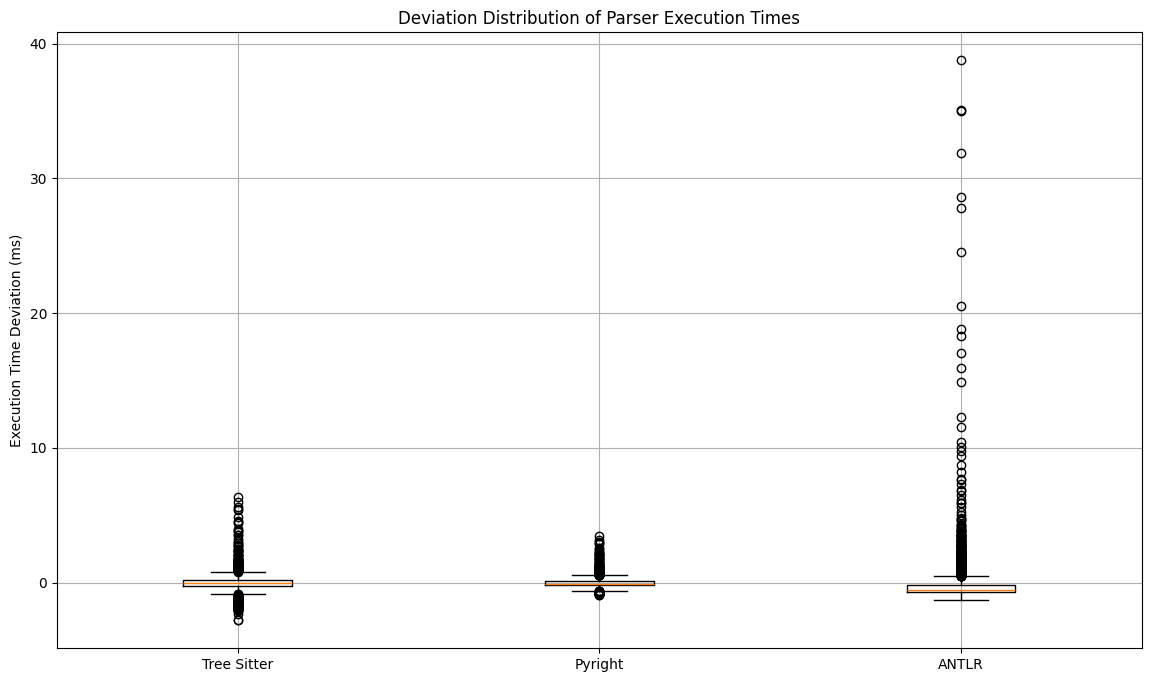

In [13]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Чтение данных из JSON-файла
with open('results.json', 'r') as f:
    data = json.load(f)

# Преобразование данных в DataFrame
df = pd.DataFrame(data)

# Линии тренда
z_tree_sitter = np.polyfit(df['size'], df['tree-sitterTime'], 1)
p_tree_sitter = np.poly1d(z_tree_sitter)
df['tree-sitter_deviation'] = df['tree-sitterTime'] - p_tree_sitter(df['size'])

z_pyright = np.polyfit(df['size'], df['pyrightTime'], 1)
p_pyright = np.poly1d(z_pyright)
df['pyright_deviation'] = df['pyrightTime'] - p_pyright(df['size'])

z_antlr = np.polyfit(df['size'], df['antlrTime'], 1)
p_antlr = np.poly1d(z_antlr)
df['antlr_deviation'] = df['antlrTime'] - p_antlr(df['size'])

# Вычисление медианных значений для отклонений
median_tree_sitter = np.median(df['tree-sitter_deviation'])
median_pyright = np.median(df['pyright_deviation'])
median_antlr = np.median(df['antlr_deviation'])

# Вычисление дисперсии и стандартного отклонения для отклонений
std_tree_sitter = np.std(df['tree-sitter_deviation'])
std_pyright = np.std(df['pyright_deviation'])
std_antlr = np.std(df['antlr_deviation'])

# Коэффициент корреляции для оригинальных данных
corr_tree_sitter = np.corrcoef(df['size'], df['tree-sitterTime'])[0, 1]
corr_pyright = np.corrcoef(df['size'], df['pyrightTime'])[0, 1]
corr_antlr = np.corrcoef(df['size'], df['antlrTime'])[0, 1]

# Вывод инфы
print(f'Median execution time deviation for Tree Sitter: {median_tree_sitter:.2f} ms')
print(f'Median execution time deviation for Pyright: {median_pyright:.2f} ms')
print(f'Median execution time deviation for ANTLR: {median_antlr:.2f} ms')
print('--------------')
print(f'Standard deviation for Tree Sitter: {std_tree_sitter:.2f}')
print(f'Standard deviation for Pyright: {std_pyright:.2f}')
print(f'Standard deviation for ANTLR: {std_antlr:.2f}')
print('--------------')
print(f'Correlation (size, execution time) for Tree Sitter: {corr_tree_sitter:.2f}')
print(f'Correlation (size, execution time) for Pyright: {corr_pyright:.2f}')
print(f'Correlation (size, execution time) for ANTLR: {corr_antlr:.2f}')

# Построение боксплотов для отклонений
plt.figure(figsize=(14, 8))
plt.boxplot([df['tree-sitter_deviation'], df['pyright_deviation'], df['antlr_deviation']], labels=['Tree Sitter', 'Pyright', 'ANTLR'])
plt.ylabel('Execution Time Deviation (ms)')
plt.title('Deviation Distribution of Parser Execution Times')
plt.grid(True)
plt.show()
